Тут тоже полностью практику защитил, поэтому только дз

Задание №4

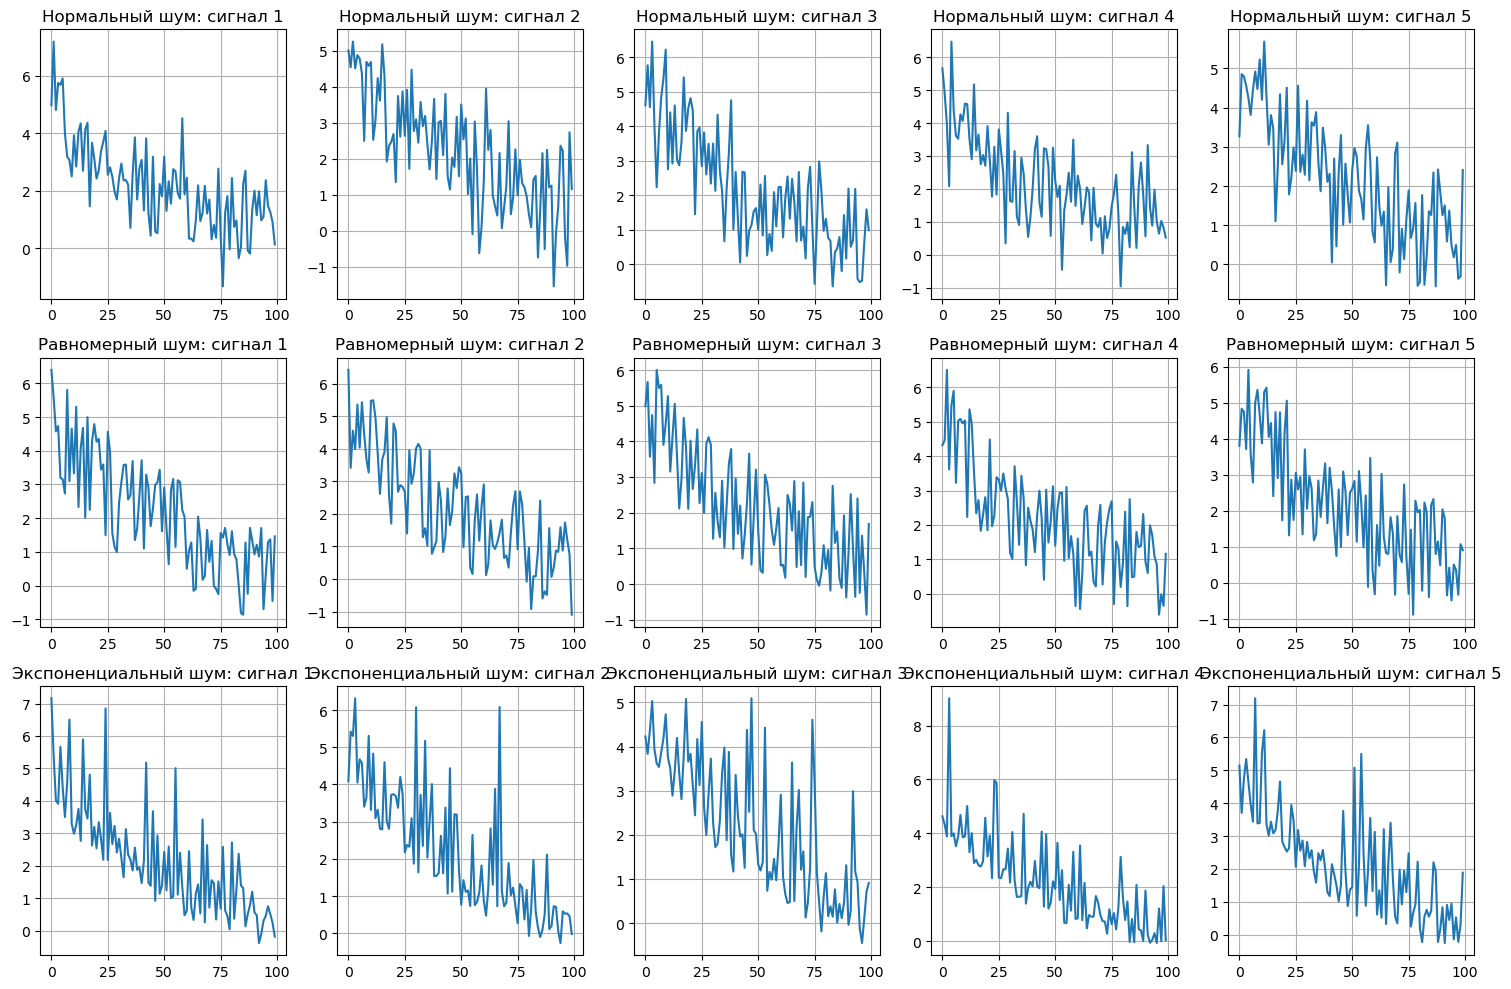

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры
N = 100  # Количество сигналов
n = 100  # Количество точек в каждом сигнале
max_error = 0.2  # Максимальная погрешность

# Параметры времени
t = np.arange(0, n, 1)  # Временные моменты ti = 0, 1, 2, ..., n-1

# Генерация основного сигнала x(t) = 5 * exp(-2t/n)
signal = 5 * np.exp(-2 * t / n)

# Функция для нормализации шума и добавления случайной погрешности
def add_noise(noise_type, N, n, max_error):
    """Генерирует шум указанного типа и добавляет случайную погрешность"""
    if noise_type == 'normal':
        noise = np.random.normal(0, 1, (N, n))  # Нормальный шум
    elif noise_type == 'uniform':
        noise = np.random.uniform(-0.5, 0.5, (N, n))  # Равномерный шум
    elif noise_type == 'exponential':
        noise = np.random.exponential(1, (N, n))  # Экспоненциальный шум
    else:
        raise ValueError("Unknown noise type")
    
    # Нормализуем шум
    noise = (noise - np.mean(noise, axis=1, keepdims=True)) / np.std(noise, axis=1, keepdims=True)
    
    # Добавляем случайную погрешность
    noise += np.random.uniform(-max_error, max_error, noise.shape)
    
    return noise

# Генерация и наложение шумов
normal_noise = add_noise('normal', N, n, max_error)
uniform_noise = add_noise('uniform', N, n, max_error)
exponential_noise = add_noise('exponential', N, n, max_error)

# Создание сигналов с различными типами шумов
normal_signals = signal + normal_noise
uniform_signals = signal + uniform_noise
exponential_signals = signal + exponential_noise

# Визуализация первых 5 сигналов с наложением шумов
fig, axes = plt.subplots(3, 5, figsize=(15, 10))

# Графики для нормального шума
for i in range(5):
    ax = axes[0, i]
    ax.plot(t, normal_signals[i])
    ax.set_title(f'Нормальный шум: сигнал {i + 1}')
    ax.grid()

# Графики для равномерного шума
for i in range(5):
    ax = axes[1, i]
    ax.plot(t, uniform_signals[i])
    ax.set_title(f'Равномерный шум: сигнал {i + 1}')
    ax.grid()

# Графики для экспоненциального шума
for i in range(5):
    ax = axes[2, i]
    ax.plot(t, exponential_signals[i])
    ax.set_title(f'Экспоненциальный шум: сигнал {i + 1}')
    ax.grid()

# Улучшение расположения графиков
plt.tight_layout()
plt.show()
